In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline

In [2]:
sns.set(rc={'figure.figsize': (9, 6)})

In [3]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1],
                     'X_2': [0, 0, 0, 1, 0, 0, 0, 1],
                     'Y': [1, 1, 1, 1, 0, 0, 0, 0]})
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [4]:
# создадим переменную classifier (классификатор)
# садим дерево (создаём экземпляр класса)
clf = tree.DecisionTreeClassifier(criterion='entropy')
type(clf)

sklearn.tree._classes.DecisionTreeClassifier

# [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [5]:
# сделаем предобработку данных
X = data[['X_1', 'X_2']]
y = data.Y

In [6]:
# обучаем дерево решений на конкретных данных
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

# [sklearn.tree.plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)

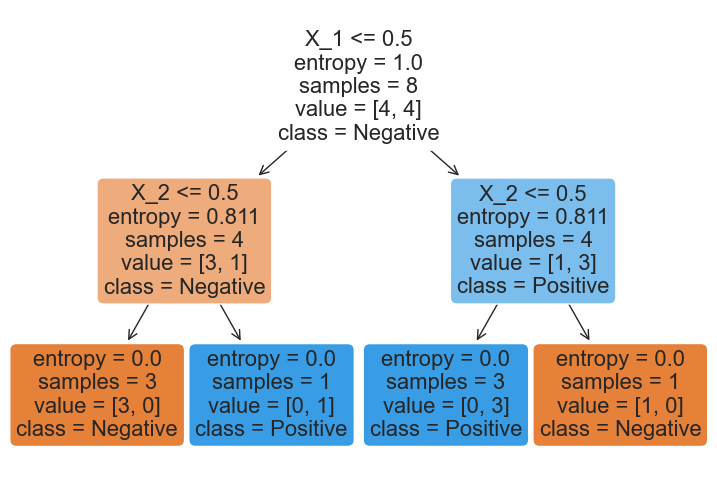

In [7]:
# Визуализируем дерево решений
tree.plot_tree(clf, feature_names=list(X),
              class_names=['Negative', 'Positive'], 
              filled=True, rounded=True);

# Классифицируем собачек и котиков

## Задача 1

## Ищем энтропии

В нашем Big Data [датасэте](https://stepik.org/media/attachments/course/4852/cats.csv) появились новые наблюдения! Давайте немного посчитаем энтропию, чтобы лучше понять, формализуемость разделения на группы.

Формат записи - энтропия в группе, где переменная равна 0 и энтропия в группе, где переменная равна 1 (десятичный разделитель - точка, округляйте до 2-ого знака при необходимости).

И формула [энтропии](https://en.wikipedia.org/wiki/Entropy_(information_theory))

In [8]:
from math import log2
import pandas as pd

pets = pd.read_csv('https://stepik.org/media/attachments/course/4852/cats.csv', index_col=0)
pets

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик
8,1,1,1,котик
9,0,0,1,котик


In [9]:
# individual series of our dataframe
woolly = pets.iloc[:, 0]
bark = pets.iloc[:, 1]
climbing = pets.iloc[:, 2]
kind = pets.iloc[:, 3]

In [10]:
# determine the entropy for each feature for each cluster
def find_tree_entropy(series: pd.Series, clusters: pd.Series) -> tuple:
    # split tree in two parts
    negative = series[series == 0].tolist()
    positive = series[series == 1].tolist()
    
    # get two clusters
    first_cluster, second_cluster = kind.unique()  # first = dog, second = cat
    
    # create two-series data frame
    df = pd.DataFrame({'series': series, 'cluster': clusters})
    
    # calculate variables
    N_1 = len(negative)
    N_2 = len(positive)
    
    n_11 = len(df[(df.series == 0) & (df.cluster == first_cluster)])  # 0 and dog
    n_12 = len(df[(df.series == 0) & (df.cluster == second_cluster)])  # 0 and cat
    n_21 = len(df[(df.series == 1) & (df.cluster == first_cluster)])  # 1 and dog
    n_22 = len(df[(df.series == 1) & (df.cluster == second_cluster)])  # 1 and cat
            
    # calculate logarithms        
    p_11 = log2(n_11 / N_1) if n_11 > 0 else 0
    p_12 = log2(n_12 / N_1) if n_12 > 0 else 0
    p_21 = log2(n_21 / N_2) if n_21 > 0 else 0
    p_22 = log2(n_22 / N_2) if n_22 > 0 else 0
        
    # calculate entropies
    entropy_negative = round(abs(-(n_11 / N_1) * p_11 -(n_12 / N_1) * p_12), 2)
    entropy_positive = round(abs(-(n_21 / N_2) * p_21 -(n_22 / N_2) * p_22), 2)
    return entropy_negative, entropy_positive

In [11]:
negative_1, positive_1 = find_tree_entropy(woolly, kind)
print(f'The negative entropy for woolly is {negative_1}, and the positive one is {positive_1}')

The negative entropy for woolly is 0.0, and the positive one is 0.99


In [12]:
negative_2, positive_2 = find_tree_entropy(bark, kind)
print(f'The negative entropy for bark is {negative_2}, and the positive one is {positive_2}')

The negative entropy for bark is 0.0, and the positive one is 0.72


In [13]:
negative_3, positive_3 = find_tree_entropy(climbing, kind)
print(f'The negative entropy for climbing is {negative_3}, and the positive one is {positive_3}')

The negative entropy for climbing is 0.0, and the positive one is 0.0


## Задача 2

## Находим значение Information gain (IG)

Ещё немного арифметики - посчитаем Information Gain по данным из предыдущего задания. Впишите через пробел округлённые до 2-ого знака значения IG для фичей Шерстист, Гавкает и Лазает по деревьям. Десятичным разделителем в данном задании является точка.

По какой переменной нужно делать сплит, исходя из всего этого (не вводите ответ на этот вопрос в поле, просто подумайте)

In [14]:
# run after problem 1
entropy = [
    [negative_1, positive_1],
    [negative_2, positive_2],
    [negative_3, positive_3],
]

entropy

[[0.0, 0.99], [0.0, 0.72], [0.0, 0.0]]

In [15]:
# additional variables for convenience
features = [woolly, bark, climbing]
# column_names = pets.columns.tolist()
column_names = ('woolly', 'bark', 'climbing')

In [16]:
# separate IG for each feature
def find_information_gain(series: pd.Series, clusters: pd.Series, entropy: list[float]) -> float:
    # create two-series data frame
    df = pd.DataFrame({'series': series, 'cluster': clusters})
    
    # get two clusters
    first_cluster, second_cluster = kind.unique()  # first = dog, second = cat
    
    dogs = len(df[df.cluster == first_cluster])  # dog
    cats = len(df[df.cluster == second_cluster])  # cat
    
    # main calculations
    N = len(df.series)
    n_1 = len(series[series == 0])
    n_2 = len(series[series == 1])
    E = abs(- dogs / N * log2(dogs / N) - cats / N * log2(cats / N))
    
    # calculate information gain
    IG = round(E - (entropy[0] * (n_1 / N) + entropy[1] * (n_2 / N)), 2)

    return IG

In [17]:
for i in range(3):
    print(f'IG by feature {column_names[i]} is equals to {find_information_gain(features[i], kind, entropy[i])}')

IG by feature woolly is equals to 0.08
IG by feature bark is equals to 0.61
IG by feature climbing is equals to 0.97


# Задача 3

Мы собрали побольше данных о котиках и собачках, и готовы обучить нашего робота их классифицировать! Скачайте тренировочный датасэт и  обучите на нём Decision Tree. После этого скачайте датасэт из задания и предскажите какие наблюдения к кому относятся. Введите число собачек в вашем датасэте.

В задании допускается определённая погрешность.

P. S.: данные в задании находятся в формате json, используйте метод pd.read_json для их прочтения

In [ ]:
# 1 - импортируем необходимые библиотеки
import pandas as pd
from sklearn import tree

In [20]:
# 2 - откроем датасет
dog_cat = pd.read_csv('E:\Курсы, которые прохожу СЕЙЧАС\Введение в Data Science и машинное обучение\Project csv\dogs_n_cats.csv')
dog_cat.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [23]:
# 3 - разбиваем данные на X и y
X = dog_cat.drop('Вид', axis=1)
y = dog_cat['Вид']

In [24]:
# 4 - обучаем решающее дерево
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf.fit(X, y)

DecisionTreeClassifier()

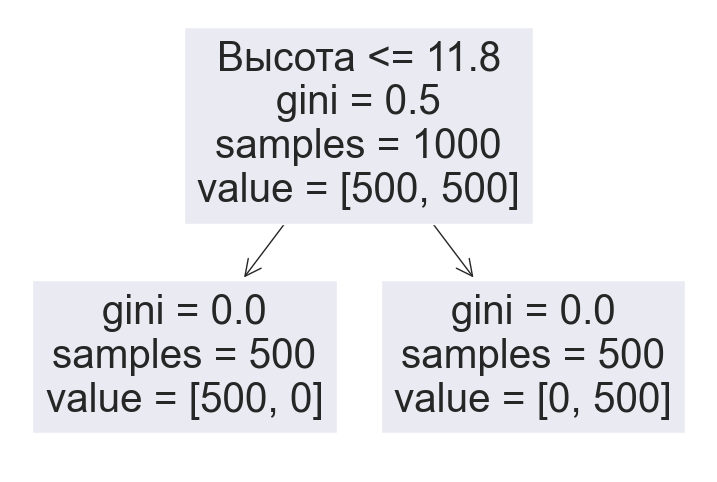

In [26]:
# 5 - визуализируем дерево решений
tree.plot_tree(clf, feature_names=X.columns);

In [35]:
# 6 - получаем тестовые данные и делаем прогноз
test = pd.read_json('E:\Курсы, которые прохожу СЕЙЧАС\Введение в Data Science и машинное обучение\Project csv\dog_cat_test.csv')
predict = clf.predict(test)

# 7 - определяем количество собачек в датасете
len(predict[predict == 'собачка'])

48